<a href="https://colab.research.google.com/github/yahiroyudai/DeepLearning2022Late/blob/main/MNISTExample2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNISTデータセットを使って手書き数字の画像判定を実装する

###ライブラリをimport


In [1]:
#from keras.engine import input_layer
#import keras 
#学習用ライブラリ
#from keras.models import Sequential #学習モデルSequentialモデル
#from keras.layers.core import Dense, Dropout, Activation#ニューロンの各層
#from keras.optimizers import RMSprop
#from keras.callbacks import EarlyStopping, CSVLogger
#MNISTデータセットを読み込む
#from keras.datasets import mnist
#表示用にpyplotを読み込む
#%matplotlib inline
#import matplotlib.pyplot as plt

In [2]:
#学習用ライブラリ
from tensorflow import keras
#MNISTデータセットを読み込む
from tensorflow.keras.datasets import mnist
#学習モデルSequentialモデル
from tensorflow.keras.models import Sequential
#ニューロンの各層
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping,CSVLogger

#表示用にpyplotを読み込む
%matplotlib inline
import matplotlib.pyplot as plt

##ハイパーパラメータ(人間が決めるパラメータ)の定義

In [3]:
#バッチサイズ(元のデータを何件ごとまとめて処理するか)
batch_size = 128
#クラス数(結果をいくつに分類するか)
num_classes = 10
#エポックサイズ(学習の回数 : 順伝播逆伝播の繰り返し数)
epochs = 20

##MNISTデータセットのデータを読み込む

In [4]:
#MNISTデータ読み込み
#x_**は画像データ、y_***は答え(その画像が数字の何なのか)
#**_trainは学習用データ、**_testは検証用データ
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##MNISTデータをいくつか表示

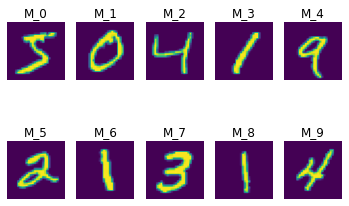

In [5]:
#ループしてx_trainに入ったMNISTの画像データを試しに表示
for i in range(10):
  #pyplotで表示していく
  plt.subplot(2, 5, i+1) #2行5列で、i+1番目の画像をプロットをセット
  plt.title("M_%d" % i) #「M_0」のような形式でタイトルを表示
  plt.axis("off") #軸線をオフ
  plt.imshow(x_train[i].reshape(28, 28), cmap = None)
#ループ終わり
plt.show()

##データの前処理(画像サイズの正規化)
データを1文字1行(1レコード)の形にする

In [6]:
#28*28ピクセルの画像を1行にすると、784ピクセルになる
#横に784個、0〜255までのRGB色数値が並ぶようにする
#x_trainは60,000字(60,000行)分*784列の2次元配列に変換することになる
x_train = x_train.reshape(60000, 784).astype('float32')
#x_testは10,000字(10,000行)分*784列の2次元配列に変換することになる
x_test = x_test.reshape(10000, 784).astype('float32')
#画像ドットの色情報(RGB 0〜255)を0〜1の小数値の範囲の変換にする
x_train /= 255 #x_trainのひとつひとつを255で割った値で上書き
x_test /= 255
#答えのデータをnum_classesの数(10)に分類
y_train = keras.utils.to_categorical(y_train, num_classes) #学習用
y_test = keras.utils.to_categorical(y_test, num_classes) #検証用

##変換したデータの形を表示して確認

In [7]:
# 学習 xデータ
print( x_train. shape)# 60.000行（6万文字レコード）784列
print( y_train. shape)# 10,000行（1万文字レコード）784列
print( x_test. shape) # 60.000行（6万文字レコード）、(num_class:0~9の分類）
print( y_test. shape)# 10,000行（1万文字レコード）、(num class:0〜9の分類）

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


##学習モデルを組み立てる
生成した学習モデルのインスタンスに層を追加していく

In [8]:
#学習モデルを生成
model = Sequential()

In [9]:
# ニューラル層を作っていく
# 784次元のデータが、任意の数だけ入力され、512次元の形で出力される
model.add(Dense(512, input_shape=(784, )))
# 活性化関数をrelu関数に指定
model.add(Activation('relu'))
# Dropout（データを間引いて過学習を防ぐ）
model.add(Dropout(0.2)) # 20％の結果値を0にリセット

##2層目を追加する

In [10]:
# ニューロンの層の追加
model. add(Dense(512)) # 512の次元で出カされる
# 活性化関数を relu 関数に指定
model. add(Activation('relu'))
# Dropout （データを聞引いて過学習を防ぐ）
model.add (Dropout(0.2)) # 20%の結果値を0にリセット

##学習モデルに3層目（最後の層）を追加する

In [11]:
#ニューロンの3層目（出力層）の追加
model.add(Dense(num_classes))#最後は10個(num classes)に分類
# 最後だけ活性化関数はsoftmaxを指定する
# （複数の出力値の合計が「1.0」（ = 100% ）になるような値を返してくれるから）
model. add ( Activation('softmax'))

##組み立てた学習モデルの要約(サマリ・概要)を表示


In [12]:
#学習モデルのサマリ
model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

##学習モデルが動く形になるようにコンパイルする

In [13]:
# modelをコンパイル
model. compile(
  loss='categorical_crossentropy',# 損失の基準(交差エントロピー誤差）
  optimizer=RMSprop(),
  metrics=['accuracy'] # accuracy=精度
) 

##学習モデルに学習させる

In [14]:
#コールバック処理の準備
#学習が進んで損失がそれ以上下がらなければ早期終了する。
#patience=2は、2回学習分だけ、終了まで様子をみる。
es = EarlyStopping(monitor='val_loss', patience=2)
#ログ出力
csv_logger = CSVLogger('training.log')

# 学習モデルに学習させる
# (正解データにフィットするように重みを調整する）
hist = model. fit(
    x_train, # 学習用画像データ：問題
    y_train, # 学習用数値データ：正解
    batch_size = batch_size, # バッチサイズ(batch_size = 20）
    epochs = epochs,# エポック数（学習回数）（epochs = 20）
    verbose = 1, # 進行状況を表示
    #validationデータ検証データ、チェックデータ）の割合
    #（10%:この分は学習に使わず、学習中の検証チェックに使う）
    validation_split = 0.1,
    callbacks=[es, csv_logger]# コールバック処理
)



Epoch 1/20
422/422 [==============================] - 16s 34ms/step - loss: 0.2591 - accuracy: 0.9195 - val_loss: 0.1005 - val_accuracy: 0.9705
Epoch 2/20
422/422 [==============================] - 7s 18ms/step - loss: 0.1043 - accuracy: 0.9685 - val_loss: 0.0737 - val_accuracy: 0.9788
Epoch 3/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0774 - accuracy: 0.9766 - val_loss: 0.0795 - val_accuracy: 0.9770
Epoch 4/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.0718 - val_accuracy: 0.9827
Epoch 5/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0732 - val_accuracy: 0.9807
Epoch 6/20
422/422 [==============================] - 7s 18ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0747 - val_accuracy: 0.9833


##学習済みのモデルを使って、学習結果をテスト検証する

In [15]:
# evaluateメソッドで検証する
score = model.evaluate(x_test, y_test, verbose=0 ) # 検証結果を変数に代入
print('test loss:', score [0])#損失(誤り率)を表示
print('test acc:', score [1])#精度(正解率)を表示

test loss: 0.07384813576936722
test acc: 0.9811000227928162


##学習履歴をグラフ表示する

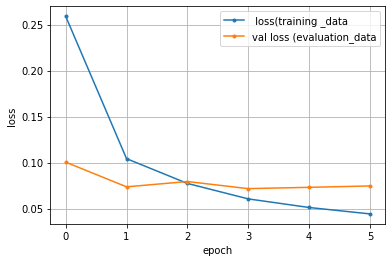

In [19]:
loss = hist.history ['loss']
val_loss = hist.history ['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label=' loss(training _data')
plt.plot(range(epochs), val_loss, marker='.', label='val loss (evaluation_data')
plt.legend (loc='best')
plt.grid()
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show ()